<a href="https://colab.research.google.com/github/aiaaee/102-Flower-Dataset/blob/main/102_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import numpy as np
from torchvision.transforms import ToTensor
import torch
from torchvision import datasets , transforms , models

from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision

In [3]:
!wget https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz

--2024-11-01 07:41:51--  https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.33.104, 52.217.90.166, 16.182.41.176, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.33.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344873452 (329M) [application/x-gzip]
Saving to: ‘flower_data.tar.gz’

flower_data.tar.gz  100%[===================>] 328.90M  39.1MB/s    in 8.2s    

2024-11-01 07:42:00 (40.2 MB/s) - ‘flower_data.tar.gz’ saved [344873452/344873452]



In [4]:
!ls

flower_data.tar.gz  sample_data


In [5]:
!mkdir '102Flowers'
!tar -xf flower_data.tar.gz -C '102Flowers'

In [6]:
import os

base_dir = '102Flowers'

train_path = os.path.join(base_dir , 'train')
test_path = os.path.join(base_dir , 'test')
val_path = os.path.join(base_dir , 'valid')


In [7]:
batch_size = 32

train_transforms = transforms.Compose([
    transforms.Resize((225 , 255)) ,
    transforms.CenterCrop(224) ,
    transforms.RandomRotation(25) ,
    transforms.RandomHorizontalFlip() ,
    transforms.ToTensor() ,
    transforms.Normalize([0.485 , 0.456 , 0.406] ,
                         [0.229 , 0.224 , 0.225])
])


train_ds = datasets.ImageFolder(train_path , train_transforms)
train_dloader = DataLoader(train_ds , batch_size=32 , shuffle=True )

In [8]:
val_transform = transforms.Compose([
    transforms.Resize((225 , 255)) ,
    transforms.CenterCrop(224) ,
    transforms.ToTensor() ,
    transforms.Normalize([0.485 , 0.456 , 0.406] ,
                         [0.229 , 0.224 , 0.225])
])

val_ds = datasets.ImageFolder(val_path , transform=val_transform)
val_dloader = DataLoader(val_ds , batch_size=32)


In [9]:
# next(iter(train_dloader))[1]
# next(iter(train_dloader))[0]
# next(iter(train_dloader))[0].size()

In [10]:
# plt.imshow(train_ds[0][0].numpy().transpose(1,2,0))

(-0.5, 1809.5, 905.5, -0.5)

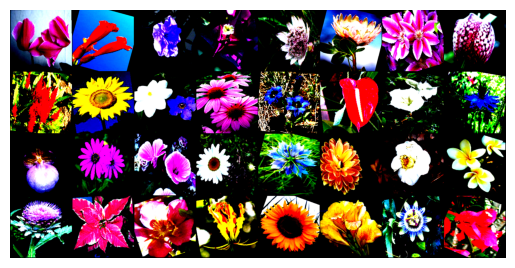

In [11]:
imgs , _ = next(iter(train_dloader))

img_grid = torchvision.utils.make_grid(imgs , nrow=8)
plt.imshow(img_grid.permute(1,2,0))
plt.axis('off')

In [12]:
model =  models.vgg16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 135MB/s]


In [13]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [14]:
# EfficientNet

In [15]:
# freeze parameters so we don't backpropagate update

for param in model.parameters():
  param.requires_grad = False

In [16]:
classifier = nn.Sequential(
    nn.Linear(25088 , 2048) ,
    nn.ReLU() ,
    nn.Dropout(0.5) ,
    nn.Linear(2048 , 2048) ,
    nn.ReLU() ,
    nn.Dropout(0.5) ,
    nn.Linear(2048 , 102)
)


model.classifier = classifier

In [17]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [18]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [19]:
learning_rate = 0.001
model.to(device )
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr=learning_rate)

In [21]:
from tqdm import tqdm

num_epoch = 10
train_loss_history = []
val_loss_history = []

for epoch in range(num_epoch) :
  train_loss = 0.0
  val_loss = 0.0
  model.train()

  for batch_indx , (imgs , labels)  in enumerate(tqdm(train_dloader)):
    imgs , labels = imgs.to(device) , labels.to(device)
    predictions = model(imgs)
    loss = criterion(predictions , labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss += loss.item()
  model.eval()

  for imgs , labels in val_dloader :
    imgs , labels = imgs.to(device) , labels.to(device)
    predictions = model(imgs)
    loss = criterion(predictions , labels)

    val_loss += loss.item()
  train_loss_history.append(train_loss / len(train_dloader))
  val_loss_history.append(val_loss / len(val_dloader))

  print(f"Epoch {epoch + 1 } / {num_epoch} | train loss : {train_loss / len(train_dloader)} | val loss : {val_loss / len(val_dloader)} ")


100%|██████████| 205/205 [01:12<00:00,  2.84it/s]


Epoch 1 / 10 | train loss : 1.7158168587742781 | val loss : 0.9318606930856521 


100%|██████████| 205/205 [01:11<00:00,  2.86it/s]


Epoch 2 / 10 | train loss : 1.6831754198888453 | val loss : 0.94972840603441 


100%|██████████| 205/205 [01:12<00:00,  2.84it/s]


Epoch 3 / 10 | train loss : 1.6745802606024394 | val loss : 0.9905436867131636 


100%|██████████| 205/205 [01:12<00:00,  2.82it/s]


Epoch 4 / 10 | train loss : 1.6764499036277212 | val loss : 1.0225110141417155 


100%|██████████| 205/205 [01:12<00:00,  2.83it/s]


Epoch 5 / 10 | train loss : 1.5722120402789697 | val loss : 0.9046326480232753 


100%|██████████| 205/205 [01:12<00:00,  2.84it/s]


Epoch 6 / 10 | train loss : 1.579936555536782 | val loss : 1.0516460781487136 


100%|██████████| 205/205 [01:12<00:00,  2.84it/s]


Epoch 7 / 10 | train loss : 1.5559023775705476 | val loss : 0.9468119883766541 


100%|██████████| 205/205 [01:12<00:00,  2.84it/s]


Epoch 8 / 10 | train loss : 1.5706606700652983 | val loss : 0.918793223798275 


100%|██████████| 205/205 [01:12<00:00,  2.82it/s]


Epoch 9 / 10 | train loss : 1.4973202065723699 | val loss : 0.9096209722069594 


100%|██████████| 205/205 [01:12<00:00,  2.84it/s]


Epoch 10 / 10 | train loss : 1.4774780833139651 | val loss : 0.7994979278972516 
